# Twitter Customer Support Dataset Anlyasis

I will be analyzing the _Customer Support on Twitter_ dataset that contains tweets, replies, and author IDs of both companies and inquiring users. The customer support is facilitated by chatbots, and this dataset will reveal inights on the annual, weekly, and daily Twitter traffic to name a few.

This dataset contains 2,811,774 rows and 7 variables.

### Column/Variable Descriptions

> **'tweet_id'**: Identifies the tweet, and is the 'in_response_tweet_id' that the user is replying to. <br>

> **'author_id'**: Contains the author of the tweet. The company account name will be shown, but all other non-company-users are referenced by an ID number. <br>

> **'inbound'**: A boolean value that determines who is reaching out to the company account. If TRUE, then the customer is reaching out and tagging the company account. If FALSE, then the company account is replying/tagging the customer. <br>

> **'created_at'**: Date and time of when the Tweet was set. <br>

> **'text'**: Contains the actual message contents of the Tweet. <br>

> **'response_tweet_id'**: References the tweet_id that it is replying to. <br>

> **'in_response_to_tweet_id'**: An ID to be referenced when this Tweet is being replied. <br>

# Data Exploration
Here, a broader understanding of the data will be made, and points of interest will be revealed to potentially focus analysis later.

In [1]:
# Useful imports
import pandas as pd
import numpy as np

In [2]:
# Load the dataset into notebook
dataset = pd.read_csv("twcs.csv")
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


As per the shape, the dataset is a compilation of 2.8 million tweets between customer support chatbots and inquiring users.

In [3]:
# Shape of DataFrame
dataset.shape

(2811774, 7)

Revealed here are the Tweet counts of inquiring users (inbound:TRUE) and customer support accounts (inbound:FALSE). It makes sense that there are more inbound than outbound tweets, as not all chatbots will be able to respond to every tweet directed at them.

In [4]:
# Number of inbound and outbound tweets
dataset['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

In [5]:
# Value type of each variable/column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [6]:
# Amount of empty values in each column
dataset.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

## Looking for Outliers
Here, it is revealed that the sum of all values before 2017 are only 2300.

In [8]:
# Sum of data points from 2008-2016
eight = dataset['created_at'].str.contains(r'2008').sum()
nine = dataset['created_at'].str.contains(r'2009').sum()
ten = dataset['created_at'].str.contains(r'2010').sum()
eleven = dataset['created_at'].str.contains(r'2011').sum()
twelve = dataset['created_at'].str.contains(r'2012').sum()
thirteen = dataset['created_at'].str.contains(r'2013').sum()
fourteen = dataset['created_at'].str.contains(r'2014').sum()
fifteen = dataset['created_at'].str.contains(r'2015').sum()
sixteen = dataset['created_at'].str.contains(r'2016').sum()
seventeen = dataset['created_at'].str.contains(r'2017').sum()

before2017 = eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen
print(before2017)

2300


## Put into perspective, the Twitter count during 2008-2016 makes up a very small percentage of the entire dataset; therefore they can be treated as outliers and be droped so that they do not impact analysis.

<AxesSubplot:title={'center':'Twitter Count: 2008-2016 vs. 2017'}, xlabel='Year', ylabel='# of Tweets in Millions'>

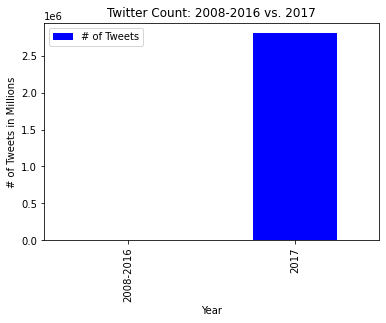

In [413]:
import plotly.express as px
year_outlier = pd.DataFrame([('2008-2016', before2017),('2017', seventeen)],
columns=('Year', '# of Tweets'))
px.bar(year_outlier,x='Year',y='# of Tweets')                                                                                                                                                                                    
year_outlier.plot.bar(title='Twitter Count: 2008-2016 vs. 2017',x='Year', ylabel='# of Tweets in Millions', color=("blue"))





In [9]:
# Drop everything before 2017, as they are outliers
df = dataset[~(dataset['created_at'] < '2017-01-02')]

In [10]:
# Top authors by response
df['in_response_to_tweet_id'].value_counts()

625011.0     844
776192.0     560
37012.0      297
5965.0       185
87814.0      174
            ... 
1058186.0      1
1058185.0      1
1058183.0      1
1058181.0      1
2987950.0      1
Name: in_response_to_tweet_id, Length: 1774822, dtype: int64

# Focusing Analysis to the "When" and "Who"
This new dataframe wiill only contain the 'author_id' and 'created_at' columns of the original dataset. Looking here will allow us to filter and reveal the twitter traffic of specific users during the year, month, and day.

In [11]:
# New dataframe to analyze author_id and dates
ac = pd.DataFrame({'author_id': df['author_id'], 
                  'created_at':df['created_at']})
ac.head()

,author_id,created_at
0,sprintcare,Tue Oct 31 22:10:47 +0000 2017
1,115712,Tue Oct 31 22:11:45 +0000 2017
2,115712,Tue Oct 31 22:08:27 +0000 2017
3,sprintcare,Tue Oct 31 21:54:49 +0000 2017
4,115712,Tue Oct 31 21:49:35 +0000 2017


In [12]:
# Number of inbound and outbound tweets
df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

# Converting the 'created_at' Column to Datetime Value for Analysis

In [124]:
# New dataframe for comparing hourly traffic
dt = pd.DataFrame({'author_id': df['author_id'], 
                  'created_at':df['created_at']})

In [110]:
# Organize by date
dt['created_at'] = pd.to_datetime(dt['created_at'])
dt.sort_values(by='created_at', ascending = True,inplace=True)
dt['created_at']

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
537388    2017-12-03 23:13:00+00:00
531793    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2811774, dtype: datetime64[ns, UTC]

In [414]:
# Make 'created_at' column a datetime value
datetime = pd.to_datetime(dt['created_at'])

In [115]:
# Sort by ascending order
datetime.sort_values(inplace=True)

In [116]:
filt = (datetime >= '2017')
dff = datetime.loc[filt]
dff

1406992   2017-01-01 15:27:37+00:00
1406984   2017-01-01 15:43:04+00:00
1406985   2017-01-01 15:45:03+00:00
1406986   2017-01-01 15:55:16+00:00
1406987   2017-01-01 15:58:40+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
537388    2017-12-03 23:13:00+00:00
531793    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2809474, dtype: datetime64[ns, UTC]

# Identifying Top Users 

In [13]:
# Top outbound twitter users by number of tweets
tu = df['author_id'].value_counts()
tu.head(10)

AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
Name: author_id, dtype: int64

## The top users act as points of interset to focus analysis, as they make up a large proportion of the dataset. Here, and moving forward, we will specifically be looking at 'AmazonHelp', 'AppleSupport', and 'Uber_Support'.

In [14]:
# Dataframe that has top 5 outbound users

Amzn = ac['author_id'].str.contains(pat='AmazonHelp').value_counts(sort=True)[True]
Appl = ac['author_id'].str.contains(pat='AppleSupport').value_counts(sort=True)[True]
Uber = ac['author_id'].str.contains(pat='Uber_Support').value_counts(sort=True)[True]
Spotify = ac['author_id'].str.contains(pat='SpotifyCares').value_counts(sort=True)[True]
Delta = ac['author_id'].str.contains(pat='Delta').value_counts(sort=True)[True]

top_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Account', '# of Entries'))
top_users

,Account,# of Entries
0,AmazonHelp,169840
1,AppleSupport,106860
2,Uber_Support,56270
3,SpotifyCares,43265
4,Delta,42253


In [15]:
# Dataframe for outbound users
dc = pd.DataFrame({'author_id': df['author_id'], 'created_at':df['created_at'], 'inbound': df['inbound']})
outbound = dc[dc['inbound'] == False]
outbound.head()

,author_id,created_at,inbound
0,sprintcare,Tue Oct 31 22:10:47 +0000 2017,False
3,sprintcare,Tue Oct 31 21:54:49 +0000 2017,False
5,sprintcare,Tue Oct 31 21:46:24 +0000 2017,False
7,sprintcare,Tue Oct 31 22:10:35 +0000 2017,False
9,sprintcare,Tue Oct 31 20:03:31 +0000 2017,False


In [16]:
outbound.shape

(1273931, 3)

## Top 5  Users

<AxesSubplot:title={'center':'Top Users by Number of Tweets'}, xlabel='Account', ylabel='# of Tweets'>

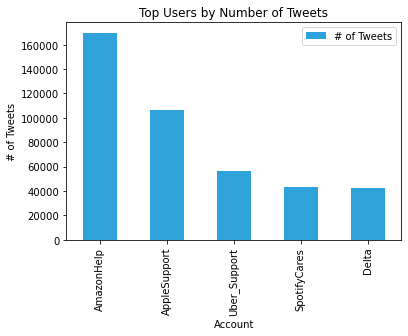

In [17]:
top_5_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Account', '# of Tweets'))
top_5_users.plot.bar(title='Top Users by Number of Tweets',x='Account', ylabel='# of Tweets', color=(0.18823529411764706, 0.63529411764705879, 0.85490196078431369))

# Inbound Users

In [18]:
# Dataframe for inbound users
dc = pd.DataFrame({'author_id': df['author_id'], 'created_at':df['created_at'], 'inbound': df['inbound']})
inbound = dc[dc['inbound'] == True]
inbound.head()

,author_id,created_at,inbound
1,115712,Tue Oct 31 22:11:45 +0000 2017,True
2,115712,Tue Oct 31 22:08:27 +0000 2017,True
4,115712,Tue Oct 31 21:49:35 +0000 2017,True
6,115712,Tue Oct 31 21:45:10 +0000 2017,True
8,115713,Tue Oct 31 22:04:47 +0000 2017,True


In [19]:
# Shape of inbound users
inbound.shape

(1537843, 3)

In [20]:
topinbound = inbound['author_id'].value_counts()[:10]
topinbound.head()

115911    1286
120576    1010
115913     563
116230     454
169172     448
Name: author_id, dtype: int64

## Top Inbound Users
> Shown here are the top inquiring users that are contacting customer support chatbots. Given the nature of customer support, a marjority of the inbound users will have a relativly smaller tweet count when compared to the outbound (chatbot) users; as interactions are for the most part brief.

<AxesSubplot:title={'center':'Top Inbound Users'}, xlabel='Outbound Users', ylabel='# of Tweets'>

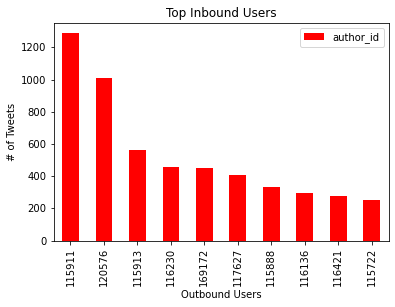

In [21]:
topinbound.plot.bar(legend=True,title='Top Inbound Users',xlabel='Outbound Users', ylabel='# of Tweets', color=('red'))

---

# What will follow is the time analysis of all users and previously identified top users

## Analysis of Monthly Traffic for All Users: This will reveal when in the year does customer support traffic increase, decrease, or plateau

In [22]:
# Sum up twitter count for each month
Jan = ac['created_at'].str.contains(r'Jan').sum()
Feb = ac['created_at'].str.contains(r'Feb').sum()
Mar = ac['created_at'].str.contains(r'Mar').sum()
Apr = ac['created_at'].str.contains(r'Apr').sum()
May = ac['created_at'].str.contains(r'May').sum()
Jun = ac['created_at'].str.contains(r'Jun').sum()
Jul = ac['created_at'].str.contains(r'Jul').sum()
Aug = ac['created_at'].str.contains(r'Aug').sum()
Sep = ac['created_at'].str.contains(r'Sep').sum()
Oct = ac['created_at'].str.contains(r"Oct").sum()
Nov = ac['created_at'].str.contains(r'Nov').sum()
Dec = ac['created_at'].str.contains(r'Dec').sum()

## All Users: Twitter Count from January to September

<AxesSubplot:title={'center':'Monthly Traffic: January - Septempber'}, xlabel='Month', ylabel='# of Tweets'>

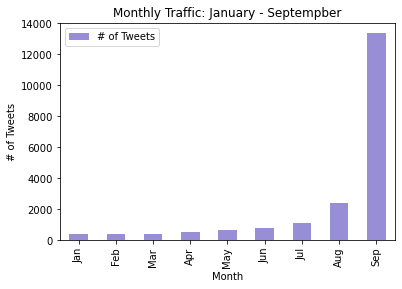

In [24]:
month_freq_jan_sep = pd.DataFrame([('Jan', Jan),('Feb', Feb),
('Mar', Mar),('Apr', Apr),('May', May),('Jun', Jun),('Jul', Jul),
('Aug', Aug),('Sep', Sep),],
columns=('Month', '# of Tweets'))
px.bar(month_freq_jan_sep,x='Month',y='# of Tweets')                                                                                                                                                                                    
month_freq_jan_sep.plot.bar(title='Monthly Traffic: January - Septempber',x='Month', ylabel='# of Tweets', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

## All Users: Twitter Count from October to December

<AxesSubplot:title={'center':'Monthly Traffic: October - December'}, xlabel='Month', ylabel='# of Tweets in Millions'>

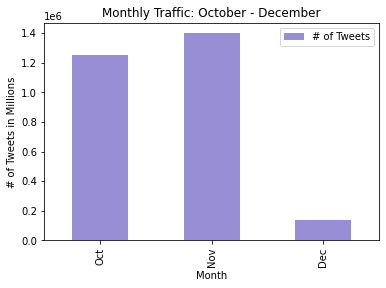

In [25]:
month_freq_oct_dec = pd.DataFrame([('Oct', Oct),('Nov', Nov),('Dec', Dec)],
columns=('Month', '# of Tweets'))
month_freq_oct_dec.plot.bar(title='Monthly Traffic: October - December',x='Month', ylabel='# of Tweets in Millions', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

## There is significant traffic in October, November, and December when compared to other months in the year. Here, two seperate graphs have to be made so that the general trend of an increase in traffic near the end of the year can be demonstrated.

## Put into perspective, it is clear that the last three months of the year make up a large proportion of the data. 
>  This spike in traffic may be a result of the abundance of seasonal events (e.g holidays, product releases, etc

<AxesSubplot:title={'center':'Monthly Traffic: January - Septempber'}, xlabel='Month', ylabel='# of Tweets'>

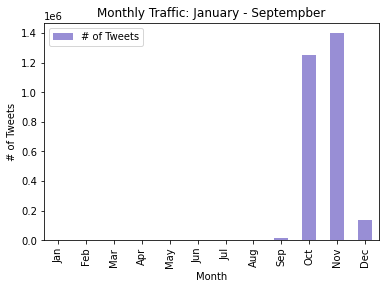

In [417]:
month_all = pd.DataFrame([('Jan', Jan),('Feb', Feb),
('Mar', Mar),('Apr', Apr),('May', May),('Jun', Jun),('Jul', Jul),
('Aug', Aug),('Sep', Sep),('Oct', Oct),('Nov', Nov),('Dec', Dec),],
columns=('Month', '# of Tweets'))
px.bar(month_all,x='Month',y='# of Tweets')                                                                                                                                                                                    
month_all.plot.bar(title='Monthly Traffic: January - Septempber',x='Month', ylabel='# of Tweets', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

# Analysis of Weekly Traffic: This will reveal when in the week does traffic increase, decrease, or level out

## Weekly Traffic: All Users
>  By taking the first three characters of the 'created_at' collumn, the day of the week is able to be extracted. Here, a new dataframe is made to clearly show what is being measured.

In [26]:
# New dataframe with days & # of tweets by extracting first 3 letters
ac['Day of the Wk'] = ac['created_at'].str[:3]
general_inital_DOW = pd.DataFrame({'# of Tweets':ac['Day of the Wk'].value_counts()})
general_inital_DOW

,# of Tweets
Fri,453028
Wed,445838
Thu,440361
Tue,423052
Mon,387847
Sat,332606
Sun,329042


In [27]:
# Organize dataframe so wk starts on Monday
general_inital_DOW = general_inital_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
general_inital_DOW

,# of Tweets
Mon,387847
Tue,423052
Wed,445838
Thu,440361
Fri,453028
Sat,332606
Sun,329042


In [28]:
# New dataframe where days are a variable and not an index 
general_final_DOW = general_inital_DOW.reset_index(level=0)
general_final_DOW = general_final_DOW.rename(columns={'index':'Day'})
general_final_DOW

,Day,# of Tweets
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


# For all users, traffic peaks at Friday then goes down on the weekend

<AxesSubplot:title={'center':'Weekly Traffic: All Users'}, xlabel='Day'>

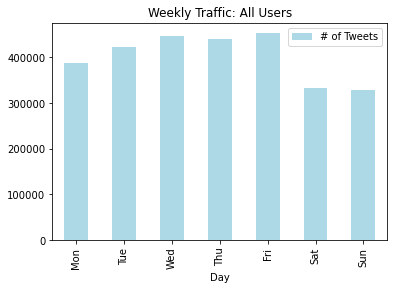

In [29]:
# Weekly traffic per day for all users
general_final_DOW.plot.bar(title='Weekly Traffic: All Users', color='#ADD8E6',x='Day', y='# of Tweets')

### This dataset will be used to merge and compare different datasets to eachother

In [30]:
# New dataframe that contains all users to be used to compare to others
all_compare = pd.DataFrame({'All Users':ac['Day of the Wk'].value_counts()})
all_compare = all_compare.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
all_compare_final = all_compare.reset_index(level=0)
all_compare_final = all_compare_final.rename(columns={'index':'Day'})
all_compare_final

,Day,All Users
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


# Weekly Traffic for Top Users

## Weekly Traffic: Amazon_Support

In [31]:
# New dataframe for weekly traffic for Amazon
amazon = ac[ac['author_id'].str.contains(pat='AmazonHelp')]
amazon['Day of the Wk'] = amazon['created_at'].str[:3]
amzn_initial_DOW = pd.DataFrame({'# of Tweets':amazon['Day of the Wk'].value_counts()})
amzn_initial_DOW = amzn_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_initial_DOW

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2652418570.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,# of Tweets
Mon,21935
Tue,25428
Wed,26858
Thu,26504
Fri,27612
Sat,21822
Sun,19681


In [32]:
amzn_final_DOW = amzn_initial_DOW.reset_index(level=0)
amzn_final_DOW = amzn_final_DOW.rename(columns={'index':'Day'})
amzn_final_DOW

,Day,# of Tweets
0,Mon,21935
1,Tue,25428
2,Wed,26858
3,Thu,26504
4,Fri,27612
5,Sat,21822
6,Sun,19681


## Amazon weekly traffic peaks on Friday

<AxesSubplot:title={'center':'Weekly Traffic: AmazonHelp'}, xlabel='Day', ylabel='# of Tweets'>

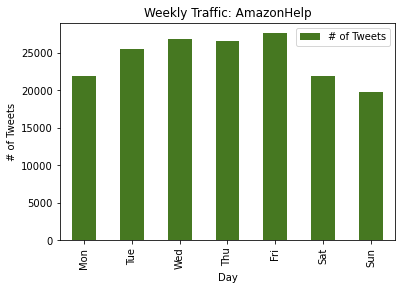

In [33]:
# Amazon weekly traffic
amzn_final_DOW.plot.bar(title='Weekly Traffic: AmazonHelp',x='Day', ylabel='# of Tweets', color=(0.27450980392156865, 0.47058823529411764, 0.12941176470588237))


In [59]:
# New dataset for Amazon to be used to compare to other users
amzn_compare = ac[ac['author_id'].str.contains(pat='AmazonHelp')]
amzn_compare['Day of the Wk'] = amzn_compare['created_at'].str[:3]
amzn_compare_inital = pd.DataFrame({'AmazonHelp':amazon['Day of the Wk'].value_counts()})
amzn_compare_inital = amzn_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_compare_final = amzn_compare_inital.reset_index(level=0)
amzn_compare_final = amzn_compare_final.rename(columns={'index':'Day'})

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/314895472.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Weekly Traffic: AppleSupport

In [37]:
# New dataframe for weekly traffic for AppleSupport
apple = ac[ac['author_id'].str.contains(pat='AppleSupport')]
apple['Day of the Wk'] = apple['created_at'].str[:3]
# appl_initial_DOW = pd.DataFrame({'# of Tweets':apple['Day of the Wk'].value_counts()})
# appl_initial_DOW = appl_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
# appl_initial_DOW

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/103834261.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
appl_final_DOW = appl_initial_DOW.reset_index(level=0)
appl_final_DOW = appl_final_DOW.rename(columns={'index':'Day'})
appl_final_DOW

,Day,# of Tweets
0,Mon,15486
1,Tue,16155
2,Wed,16831
3,Thu,15178
4,Fri,14395
5,Sat,14068
6,Sun,14747


## Apple weekly traffic peaks on Wednesday with a positive trend on Sunday
> It is important to note that Apple has both in-person and online stores. Therefore, Twitter traffic might be influenced by either or.

<AxesSubplot:title={'center':'Weekly Traffic: AppleSupport '}, xlabel='Day', ylabel='# of Tweets'>

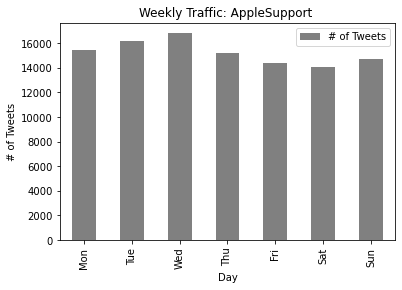

In [39]:
# AppleSupport weekly traffic
appl_final_DOW = appl_final_DOW.rename(columns={'index':'Day'})
appl_final_DOW.plot.bar(title = 'Weekly Traffic: AppleSupport ',x='Day', ylabel='# of Tweets',color = (0.50196078431372548, 0.50196078431372548, 0.50196078431372548))

In [40]:
# New dataset for AppleSupport to be used to compare to other users
appl_compare = ac[ac['author_id'].str.contains(pat='AppleSupport')]
appl_compare['Day of the Wk'] = appl_compare['created_at'].str[:3]
appl_compare_inital = pd.DataFrame({'AppleSupport':apple['Day of the Wk'].value_counts()})
appl_compare_inital = appl_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
apple_compare_final = appl_compare_inital.reset_index(level=0)
apple_compare_final = apple_compare_final.rename(columns={'index':'Day'})

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/3542266967.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Indepth Time Analysis of Ridesharing Apps
## Weekly Traffic: Ridesharing Apps
> Interestingly, ride sharing apps (Uber & Lyft), like other services, are uniquly influenced by recreational and social activity. Meaning, the days of the week that are generally more socially active might correspond to increases in customer support traffic. 

## Weekly Traffic: Uber_Support

In [41]:
# New dataframe for weekly traffic for Uber_Support account
uber = ac[ac['author_id'].str.contains(pat='Uber_Support')]
uber['Day of the Wk'] = uber['created_at'].str[:3]
uber_initial_DOW = pd.DataFrame({'# of Tweets':uber['Day of the Wk'].value_counts()})
uber_initial_DOW = uber_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_initial_DOW

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1935850491.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,# of Tweets
Mon,7412
Tue,8039
Wed,8068
Thu,8718
Fri,8991
Sat,7350
Sun,7692


In [42]:
uber_final_DOW = uber_initial_DOW.reset_index(level=0)
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW

,Day,# of Tweets
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


## Uber weekly traffic peaks on Friday with a positive trend on Sunday 
> It is important to consider that ridesharing servies might uniquly follow recreational activity. Furthremore, factors like the availability of public transit and when people are most socially active might influence the use of their services (and sequential customer support activity). Due to the nature of the kind of service Uber provides, their trends might differ than that of retail or online stores like Apple or Amazon. These differences will be highlighted later.

<AxesSubplot:title={'center':'Weekly Traffic: Uber_Support'}, xlabel='Day', ylabel='# of Tweets'>

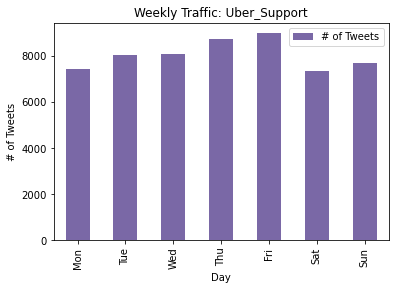

In [43]:
# Uber_Support weekly traffic
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW.plot.bar(title='Weekly Traffic: Uber_Support',x='Day', ylabel='# of Tweets', color = (0.47843137254901963, 0.40784313725490196, 0.65098039215686276))

In [80]:
# New dataset for Uber_Support to be used to compare to other users
uber_compare = ac[ac['author_id'].str.contains(pat='Uber_Support')]
uber_compare['Day of the Wk'] = uber_compare['created_at'].str[:3]
uber_compare_inital = pd.DataFrame({'Uber_Support':uber['Day of the Wk'].value_counts()})
uber_compare_inital = uber_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_compare_final = uber_compare_inital.reset_index(level=0)
uber_compare_final = uber_compare_final.rename(columns={'index':'Day'})
uber_compare_final

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2975849866.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Day,Uber_Support
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


## Weekly Traffic: AskLyft
> In order to gain more information on the unique Twitter traffic that ridesharing services have (as see with Uber_Support), I look at another popular ridesharing app to potentially reinforce previous observations.

In [64]:
# New dataframe for weekly traffic for Uber_Support account
lyft = ac[ac['author_id'].str.contains(pat='Lyft')]
lyft['Day of the Wk'] = lyft['created_at'].str[:3]
lyft_initial_DOW = pd.DataFrame({'# of Tweets':uber['Day of the Wk'].value_counts()})
lyft_initial_DOW = lyft_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
lyft_initial_DOW

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2008513786.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,# of Tweets
Mon,7412
Tue,8039
Wed,8068
Thu,8718
Fri,8991
Sat,7350
Sun,7692


In [65]:
lyft_final_DOW = lyft_initial_DOW.reset_index(level=0)
lyft_final_DOW = lyft_final_DOW.rename(columns={'index':'Day'})
lyft_final_DOW

,Day,# of Tweets
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


# Lyft peaks on Friday and starts to increase again on Sunday

<AxesSubplot:title={'center':'Weekly Traffic: AskLyft'}, xlabel='Day', ylabel='# of Tweets'>

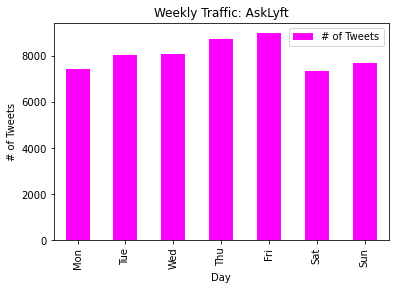

In [74]:
# Uber_Support weekly traffic
lyft_final_DOW = lyft_final_DOW.rename(columns={'index':'Day'})
lyft_final_DOW.plot.bar(title='Weekly Traffic: AskLyft',x='Day', ylabel='# of Tweets', color = ('magenta'))

In [84]:
# New dataset for AskLyft to be used to compare to other users
lyft_compare = ac[ac['author_id'].str.contains(pat='AskLyft')]
lyft_compare['Day of the Wk'] = lyft_compare['created_at'].str[:3]
lyft_compare_inital = pd.DataFrame({'AskLyft':lyft['Day of the Wk'].value_counts()})
lyft_compare_inital = lyft_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
lyft_compare_final = lyft_compare_inital.reset_index(level=0)
lyft_compare_final = lyft_compare_final.rename(columns={'index':'Day'})
lyft_compare_final

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2069748366.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Day,AskLyft
0,Mon,1454
1,Tue,1589
2,Wed,1793
3,Thu,1912
4,Fri,2020
5,Sat,1557
6,Sun,1484


## Weekly Traffic: Ride Sharing Apps (Uber_Support & AskLyft)
> By ignoring the differences in the Twitter count of the two, and shifting focus on the trends, what can be revealed is that traffic similarly increases on Friday, and again starts to increase on Sunday.

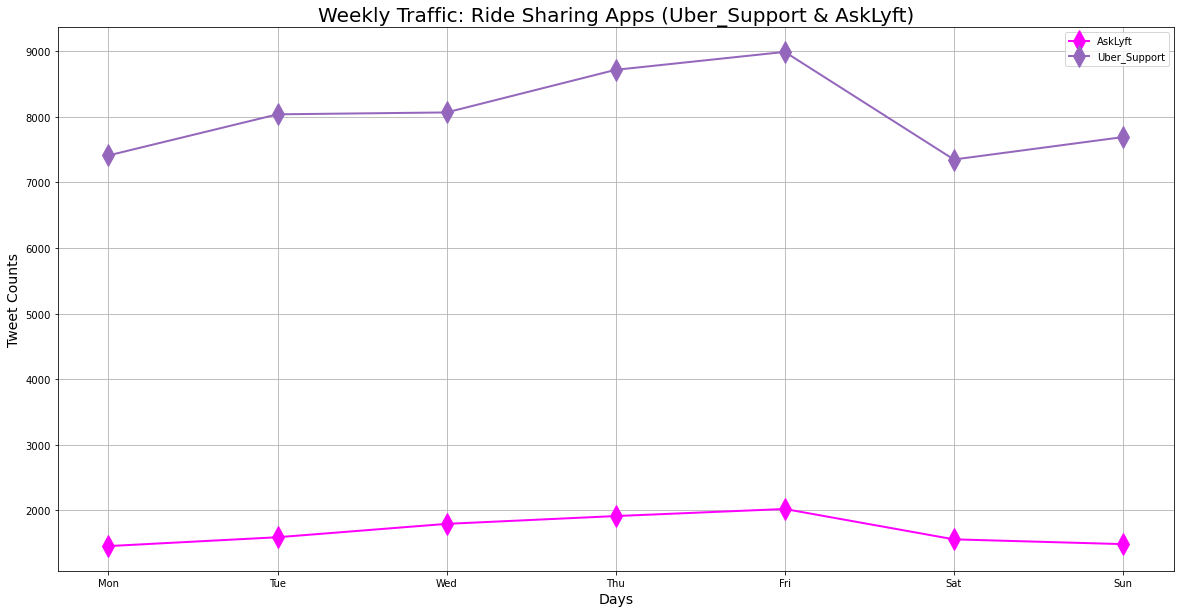

In [431]:
fig = plt.figure(figsize=(20,10))

plt.plot(lyft_compare_final['Day'], lyft_compare_final['AskLyft'], color='magenta', marker='d',linewidth=2, markersize=15, label='AskLyft')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: Ride Sharing Apps (Uber_Support & AskLyft)', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Hourly Traffic: Ride Sharing Apps (AskLyft & Uber_Support)

## Hourly Traffic: Uber_Support

In [419]:
# New dataframe for Amazon hourly traffic in 2017
dfuber = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
uber_time = dfuber[dfuber['author_id'].str.contains(pat='Uber_Support')]
uber_time['created_at'] = pd.to_datetime(dt['created_at'])
uber_time.sort_values(by='created_at', ascending = True,inplace=True)
uber_time.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2822833401.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2822833401.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,author_id,created_at
1308255,Uber_Support,2014-12-20 00:00:42+00:00
1155457,Uber_Support,2015-04-16 16:56:32+00:00
1434587,Uber_Support,2015-07-20 07:53:15+00:00
1707408,Uber_Support,2015-08-06 22:51:01+00:00
2303720,Uber_Support,2015-10-29 22:41:26+00:00


In [421]:
uber_time['Hours Count'] = dff.dt.hour
uber_hour_count = pd.DataFrame({'Twitter Count':uber_time['Hours Count'].value_counts()})
uber_sorted_hour_initial = uber_hour_count.sort_index(ascending=True)
uber_sorted_hour_final = uber_sorted_hour_initial.reset_index(level=0)
uber_sorted_hour_final = uber_sorted_hour_final.rename(columns={'index':'Hour'})
uber_sorted_hour_final.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1265275542.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hour,Twitter Count
0,0.0,2153
1,1.0,2044
2,2.0,2256
3,3.0,2285
4,4.0,2406


## Uber Twitter traffic reaches it's minimum at 9am and peaks at 4pm
> This sharp decrease in the morning might be a conseqence of the fact that public transportation is more accessible during this time and might be a cheaper alternative that ridesharing apps. Conversly, this releationship becomes might become inversed at 4pm and late into the night, as options for transportation become constricted.

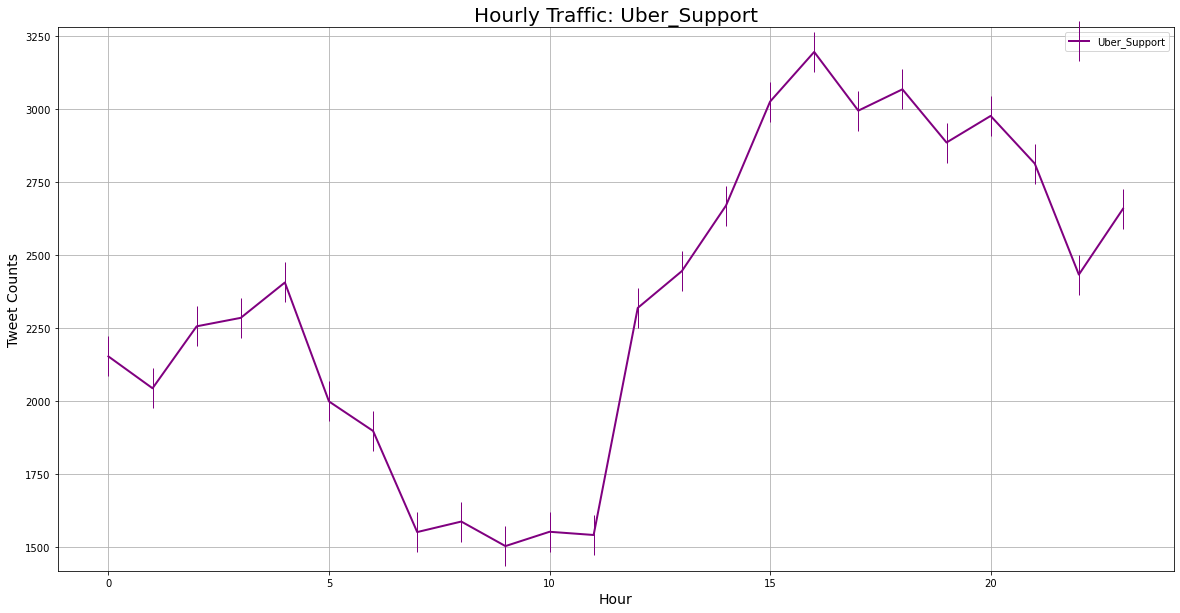

In [423]:
fig = plt.figure(figsize=(20,10))

plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=40, label='Uber_Support')

plt.title('Hourly Traffic: Uber_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [424]:
# New dataset for Uber_Support to be used to be merged with others
uber_time['Hours Count'] = dff.dt.hour
uber_hour_compare = pd.DataFrame({'Uber_Support Count':uber_time['Hours Count'].value_counts()})
uber_sorted_hour_compare_initial = uber_hour_compare.sort_index(ascending=True)
uber_sorted_hour_compare_final = uber_sorted_hour_compare_initial.reset_index(level=0)
uber_sorted_hour_compare_final = uber_sorted_hour_compare_final.rename(columns={'index':'Hour'})
uber_sorted_hour_compare_final.head(5)

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/551505644.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hour,Uber_Support Count
0,0.0,2153
1,1.0,2044
2,2.0,2256
3,3.0,2285
4,4.0,2406


## Hourly Traffic: AskLyft
> After analyzing the Uber_Support data -- specifically the hourly traffic and how it increases in the evening and late night -- I look toward another poplar ridesharing app to potentially reinforce the claim that this unique trend is shared amongst ridesharing services.

In [420]:
# New dataframe for Amazon hourly traffic in 2017
dflyft = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
lyft_time = dflyft[dflyft['author_id'].str.contains(pat='AskLyft')]
lyft_time['created_at'] = pd.to_datetime(dt['created_at'])
lyft_time.sort_values(by='created_at', ascending = True,inplace=True)
lyft_time.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1023074638.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1023074638.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,author_id,created_at
256622,AskLyft,2015-08-20 23:38:28+00:00
1696499,AskLyft,2016-04-12 01:37:52+00:00
256625,AskLyft,2016-05-20 23:51:47+00:00
2003310,AskLyft,2016-08-28 19:49:31+00:00
1043334,AskLyft,2016-09-12 22:08:15+00:00


In [422]:
lyft_time['Hours Count'] = dff.dt.hour
lyft_hour_count = pd.DataFrame({'Twitter Count':lyft_time['Hours Count'].value_counts()})
lyft_sorted_hour_initial = lyft_hour_count.sort_index(ascending=True)
lyft_sorted_hour_final = lyft_sorted_hour_initial.reset_index(level=0)
lyft_sorted_hour_final = lyft_sorted_hour_final.rename(columns={'index':'Hour'})
lyft_sorted_hour_final.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1009466251.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hour,Twitter Count
0,0.0,627
1,1.0,588
2,2.0,525
3,3.0,490
4,4.0,351


## Lyft Twitter traffic reaches it's minimum at 10am and peaks at 5pm
> This sharp decrease might be a conseqence of the fact that public transportation is more accessible during this time and might be a cheaper alternative that ridesharing apps. Conversly, this releationship becomes might become inversed at 5pm and late into the night.

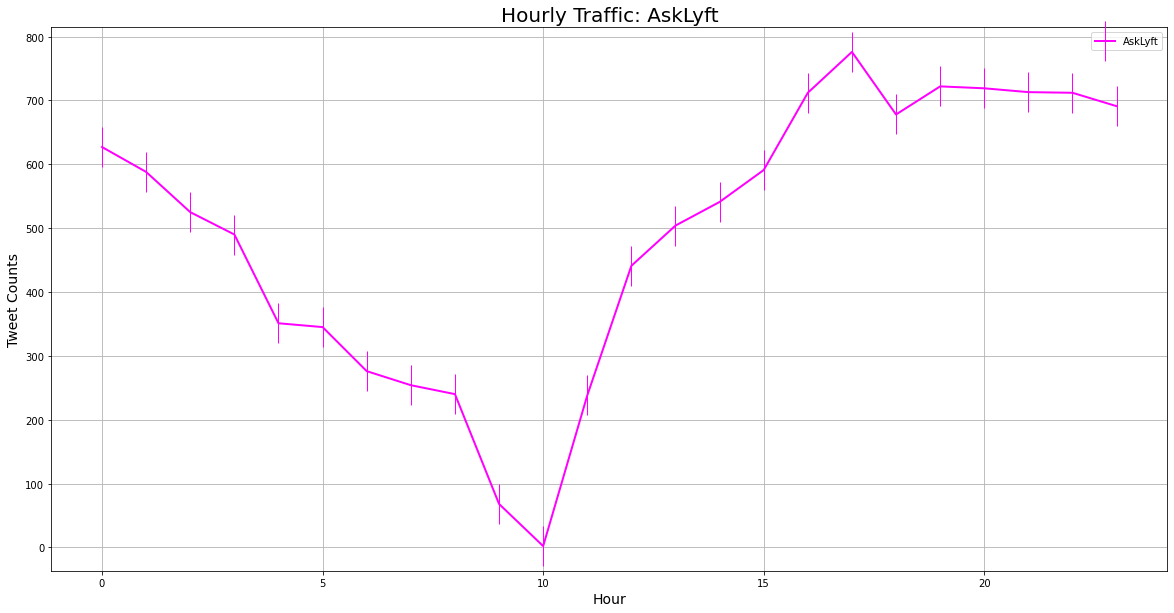

In [425]:
fig = plt.figure(figsize=(20,10))

plt.plot(lyft_sorted_hour_final['Hour'], lyft_sorted_hour_final['Twitter Count'], color='magenta', marker='|',linewidth=2, markersize=40, label='AskLyft')

plt.title('Hourly Traffic: AskLyft', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [426]:
# New dataset for AskLyft to be used to be merged with others
lyft_time['Hours Count'] = dff.dt.hour
lyft_hour_compare = pd.DataFrame({'AskLyft Count':lyft_time['Hours Count'].value_counts()})
lyft_sorted_hour_compare_initial = lyft_hour_compare.sort_index(ascending=True)
lyft_sorted_hour_compare_final = lyft_sorted_hour_compare_initial.reset_index(level=0)
lyft_sorted_hour_compare_final = lyft_sorted_hour_compare_final.rename(columns={'index':'Hour'})
lyft_sorted_hour_compare_final.head(5)

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1221662566.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hour,AskLyft Count
0,0.0,627
1,1.0,588
2,2.0,525
3,3.0,490
4,4.0,351


# Hourly Traffic: Comparing Ride Sharing Apps (AskLyft & Uber_Support)

## Lyft and Uber follow very similar trends
> As previously stated, ridesharing apps share a trend of an increase in the evening and late night. Again, this may potentially be due to the lack of other available kinds of transportation (i.e public transit does not run late into the day or are too crowded). This graph reinforces the claim that ridesharing apps share similar Twitter traffic as a result of the nature of the service they provide.

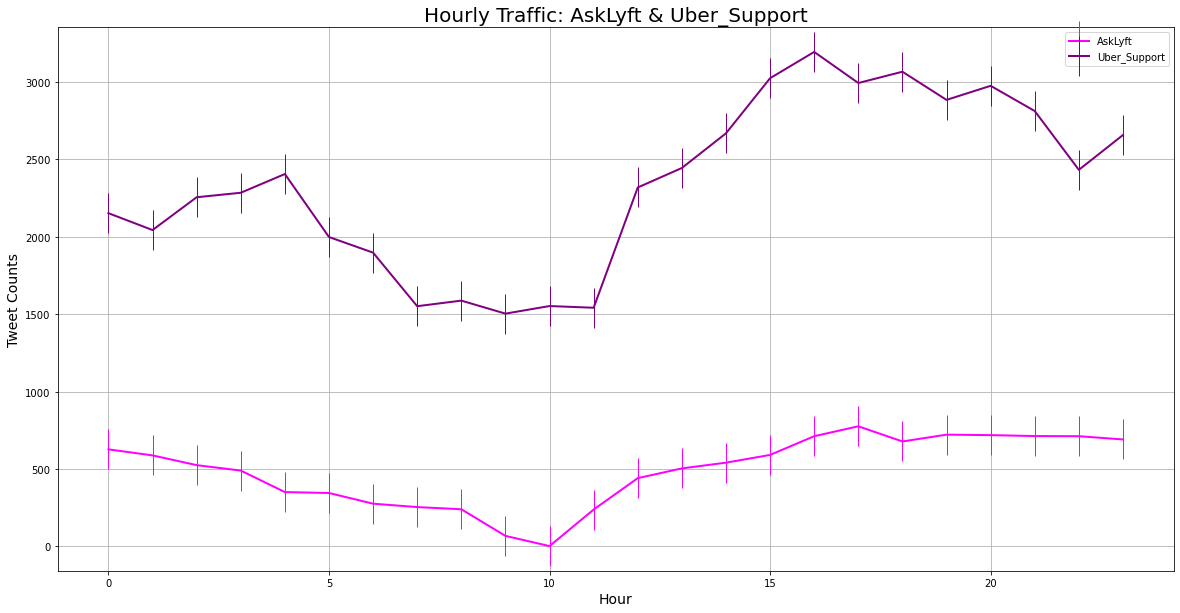

In [427]:
fig = plt.figure(figsize=(20,10))

plt.plot(lyft_sorted_hour_final['Hour'], lyft_sorted_hour_final['Twitter Count'], color='magenta', marker='|',linewidth=2, markersize=40, label='AskLyft')
plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=40, label='Uber_Support')

plt.title('Hourly Traffic: AskLyft & Uber_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Comparing Weekly Traffic of Top Users to Each Other

## Weekly Traffic: AmazonHelp & AppleSupport & Uber_Support
> Amazon and Uber are similar in that they peak in traffic on friday while Apple peaks on Wednesday. However, Uber and Apple similarly increase in traffic on Sunday, while Amazon decreases.

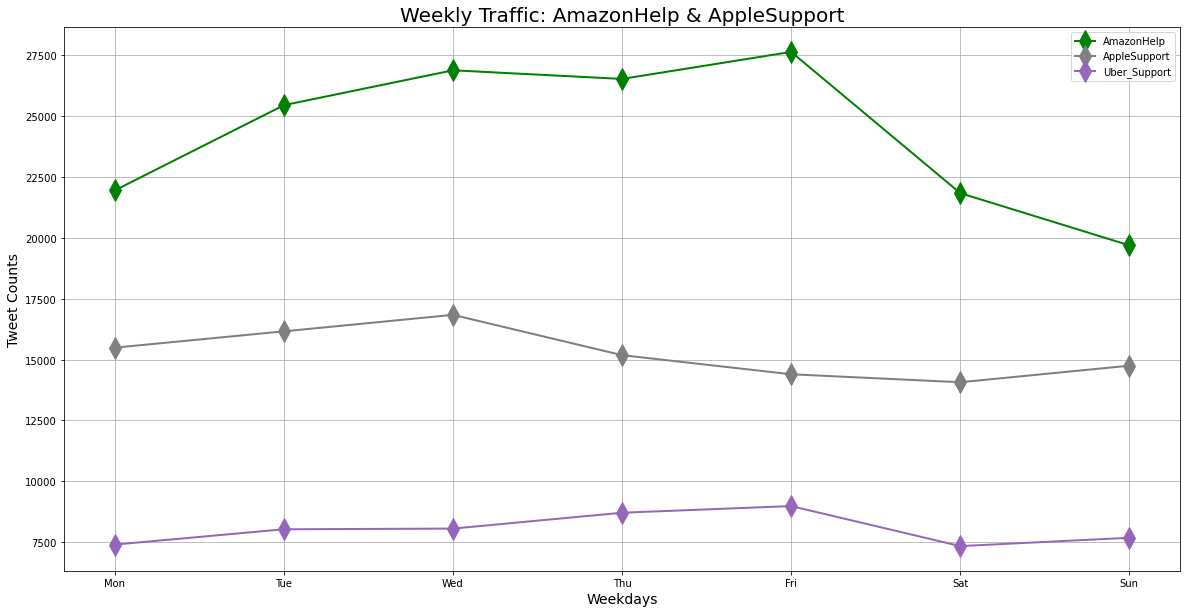

In [49]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

---

# Hourly Traffic Analysis of All Users

In [92]:
dff.dt.hour.head()

1406992    15
1406984    15
1406985    15
1406986    15
1406987    15
Name: created_at, dtype: int64

In [93]:
dt['Hours Count'] = dff.dt.hour
hour_count = pd.DataFrame({'Twitter Count':dt['Hours Count'].value_counts()})
sorted_hour_initial = hour_count.sort_index(ascending=True)
sorted_hour_initial.head(5)

,Twitter Count
0.0,113227
1.0,107710
2.0,98028
3.0,88502
4.0,78907


In [94]:
sorted_hour_final = sorted_hour_initial.reset_index(level=0)
sorted_hour_final = sorted_hour_final.rename(columns={'index':'Hour'})
sorted_hour_final.head(5)

,Hour,Twitter Count
0,0.0,113227
1,1.0,107710
2,2.0,98028
3,3.0,88502
4,4.0,78907


# For all users, traffic is generated in the afternoon and peaks around 5pm
> The low amount of Tweets during early day is likely due to less peopole being awake that early in the morning.

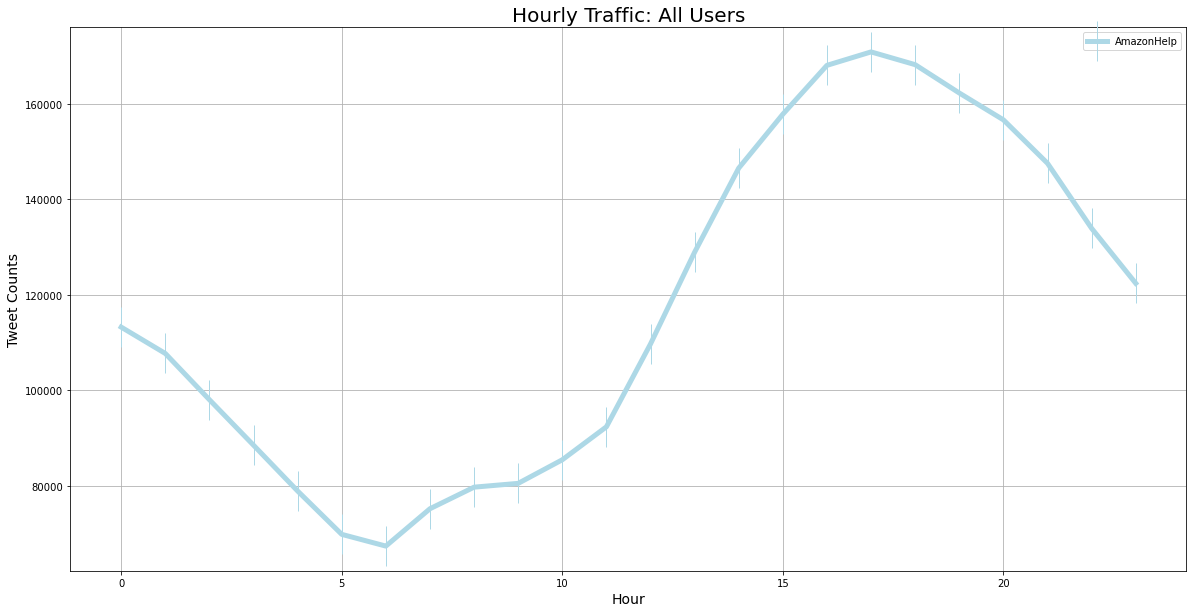

In [95]:
fig = plt.figure(figsize=(20,10))

plt.plot(sorted_hour_final['Hour'], sorted_hour_final['Twitter Count'], color='#ADD8E6', marker='|',linewidth=5, markersize=40, label='AmazonHelp')

plt.title('Hourly Traffic: All Users', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# New dataset for AmazonHelp to be used to be merged with others
dt['Hours Count'] = dff.dt.hour
hour_count_compare = pd.DataFrame({'All Users Count':dt['Hours Count'].value_counts()})
sorted_hour_compare_initial = hour_count_compare.sort_index(ascending=True)
sorted_hour_compare_final = sorted_hour_compare_initial.reset_index(level=0)
sorted_hour_compare_final = sorted_hour_compare_final.rename(columns={'index':'Hour'})
sorted_hour_compare_final.head(5)

---

# In depth time analysis of AmazonHelp Twitter traffic

In [295]:
# New dataframe for Amazon hourly traffic in 2017
dfamzn = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
amzn_time = dfamzn[dfamzn['author_id'].str.contains(pat='AmazonHelp')]

In [297]:
amzn_time['created_at'] = pd.to_datetime(dt['created_at'])
amzn_time.sort_values(by='created_at', ascending = True,inplace=True)
amzn_time.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1721972967.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1721972967.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,author_id,created_at
576269,AmazonHelp,2015-06-13 02:16:59+00:00
322256,AmazonHelp,2015-06-26 19:41:21+00:00
322249,AmazonHelp,2015-06-26 23:52:06+00:00
322251,AmazonHelp,2015-06-27 07:41:36+00:00
104320,AmazonHelp,2015-07-17 14:36:17+00:00


In [275]:
amzn_time.dtypes

author_id                  object
created_at    datetime64[ns, UTC]
dtype: object

## Monthly Traffic: AmazonHelp


In [338]:
amzn_time['Month Count'] = dff.dt.month
amzn_month_count = pd.DataFrame({'Twitter Count':amzn_time['Month Count'].value_counts()})
amzn_sorted_month_initial = amzn_month_count.sort_index(ascending=True)
amzn_sorted_month_final = amzn_sorted_month_initial.reset_index(level=0)
amzn_sorted_month_final = amzn_sorted_month_final.rename(columns={'index':'Month'})
amzn_sorted_month_final.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2665033766.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Twitter Count
0,1.0,8
1,2.0,6
2,3.0,4
3,4.0,11
4,5.0,23


# Amazon traffic peaks during October and November: These two months will serve as starting points for deeper analysis

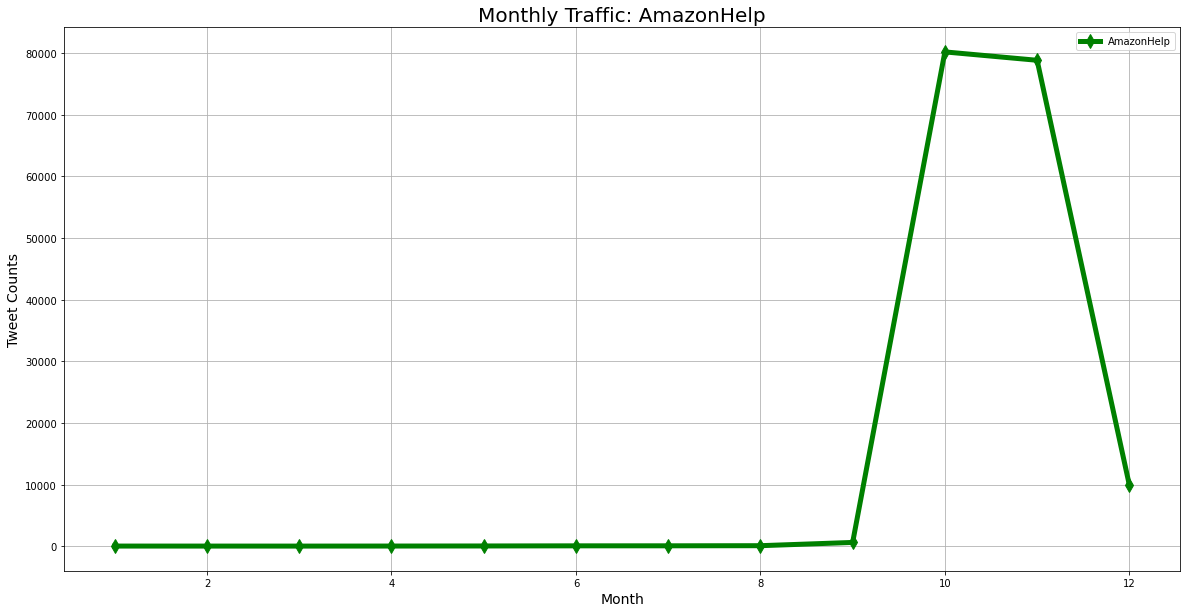

In [337]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_month_final['Month'], amzn_sorted_month_final['Twitter Count'], color='green', marker='d',linewidth=5, markersize=10, label='AmazonHelp')

plt.title('Monthly Traffic: AmazonHelp', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

October and November are points of interest, as there is a sharp increase in traffic. This might be because of a product release, or more people using Amazon as a webserivce to buy things; therefore, events like Black Friday or holidays (e.g Thanksgiving) are likely to impact traffic.

## Traffic in October (Release of Amazon Kindle Oasis 2nd Generation and Amazon Echo (2017))
> Upon further research, a popular product was released during this time, and it might be responsible for the sharp increase in traffic that was seen above.

In [372]:
dfamzn_month = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
amzn_time_month = dfamzn_month[dfamzn_month['author_id'].str.contains(pat='AmazonHelp')]
amzn_time_month['created_at'] = pd.to_datetime(dt['created_at'])
amzn_time_month.sort_values(by='created_at', ascending = True,inplace=True)
amzn_time_month.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2614851001.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2614851001.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,author_id,created_at
576269,AmazonHelp,2015-06-13 02:16:59+00:00
322256,AmazonHelp,2015-06-26 19:41:21+00:00
322249,AmazonHelp,2015-06-26 23:52:06+00:00
322251,AmazonHelp,2015-06-27 07:41:36+00:00
104320,AmazonHelp,2015-07-17 14:36:17+00:00


In [368]:
# Amazon October Filter
amazon_oct_filt = amzn_time_month.loc[
    (amzn_time_month['created_at'] >= '2017-10-1')
    & (amzn_time_month['created_at'] <= '2017-10-31')]
amazon_oct_filt['Day Count'] = dff.dt.day
amzn_oct_count = pd.DataFrame({'Twitter Count':amazon_oct_filt['Day Count'].value_counts()})
amzn_sorted_oct_initial = amzn_oct_count.sort_index(ascending=True)

amzn_sorted_oct_final = amzn_sorted_oct_initial.reset_index(level=0)
amzn_sorted_oct_final = amzn_sorted_oct_final.rename(columns={'index':'Month'})
amzn_sorted_oct_final.head()


/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/3829922431.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Twitter Count
0,1,58
1,2,134
2,3,224
3,4,1961
4,5,3466


# Release Date of Amazon Kindle Oasis 2nd Generation & Amazon Echo (2017): October 31, 2017
> Interestingly, there is a sharp decrease in traffic leading up to their release. This makes senses as people may stop buying old product in favor of waiting for the new models to be released. What can be predicted is that at the start of November, there will again be a increase in traffic as more people start buying the new products.

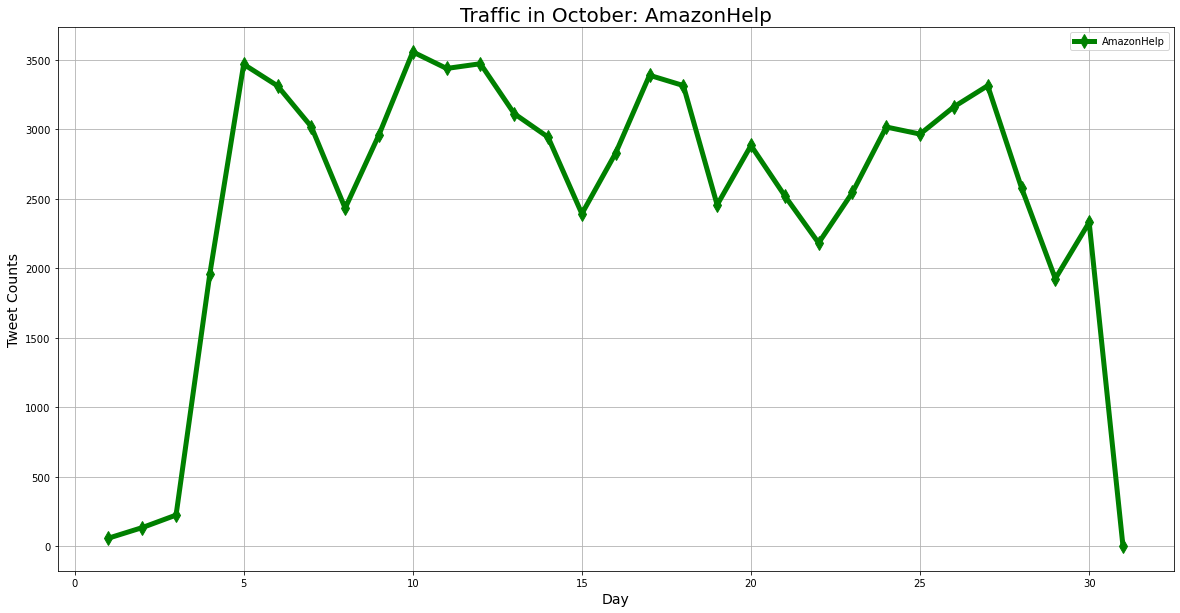

In [406]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_oct_final['Month'], amzn_sorted_oct_final['Twitter Count'], color='green', marker='d',linewidth=5, markersize=10, label='AmazonHelp')

plt.title('Traffic in October: AmazonHelp', fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Traffic in November Following the Release of Amazon Kindle Oasis (2nd Gen), Amazon Echo (2017), and Other Important Dates

In [404]:
# Amazon October Filter
amazon_nov_filt = amzn_time_month.loc[
    (amzn_time_month['created_at'] >= '2017-11-1')
    & (amzn_time_month['created_at'] <= '2017-11-30')]
amazon_nov_filt['Day Count'] = dff.dt.day
amzn_nov_count = pd.DataFrame({'Twitter Count':amazon_nov_filt['Day Count'].value_counts()})
amzn_sorted_nov_initial = amzn_nov_count.sort_index(ascending=True)

amzn_sorted_nov_final = amzn_sorted_nov_initial.reset_index(level=0)
amzn_sorted_nov_final = amzn_sorted_nov_final.rename(columns={'index':'Month'})
amzn_sorted_nov_final.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/3784682196.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Twitter Count
0,1,2355
1,2,2765
2,3,3313
3,4,2591
4,5,1913


# November Traffic Analysis
## Important Dates to Consider:
>**1) Release of Amazon Kindle Oasis (2nd Gen) & Amazon Echo (2017): October 31, 2017**<br>

>**2) Thanksgiving: November 23**

>**3) Black Friday: November 24**<br>

After these important dates, there is a general increase in traffic thereafter. Specifically with Thanksgiving and Black Friday, it makes logical sense that there would be a spike in traffic, as people are likely using Amazon to buy things online and might may customer support. The ups and downs of the graph may be a product of various marketing promotions that are happening throughout the month, as people may halt shopping in favor of an upcoming discount.

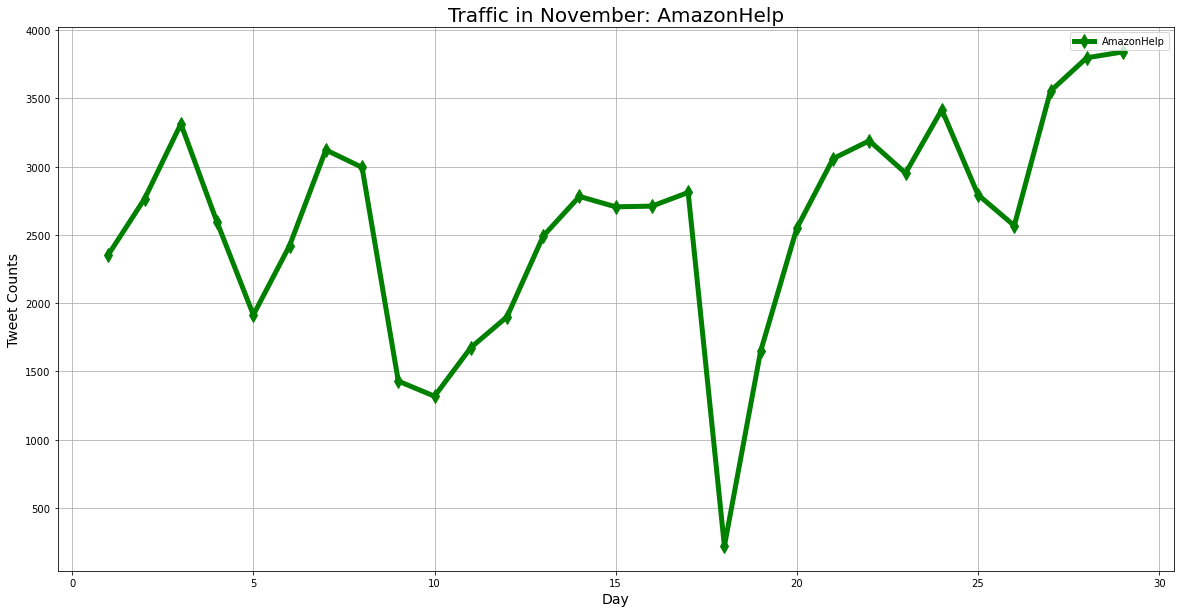

In [430]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_nov_final['Month'], amzn_sorted_nov_final['Twitter Count'], color='green', marker='d',linewidth=5, markersize=10, label='AmazonHelp')

plt.title('Traffic in November: AmazonHelp', fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Hourly Traffic: AmazonHelp
> This will reveal when in the day does traffic increase and decrease. This might be influenced by things like work schedules, free-time available, and freqency levels of recreational activity (e.g shopping).

In [167]:
amzn_time['Hours Count'] = dff.dt.hour
amzn_hour_count = pd.DataFrame({'Twitter Count':amzn_time['Hours Count'].value_counts()})
amzn_sorted_hour_initial = amzn_hour_count.sort_index(ascending=True)
amzn_sorted_hour_final = amzn_sorted_hour_initial.reset_index(level=0)
amzn_sorted_hour_final = amzn_sorted_hour_final.rename(columns={'index':'Hour'})
amzn_sorted_hour_final.head(5)


/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1495764797.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hour,Twitter Count
0,0.0,4573
1,1.0,4844
2,2.0,4517
3,3.0,5093
4,4.0,5246


In [183]:
# New dataset for AmazonHelp to be used to be merged with others
amzn_time['Hours Count'] = dff.dt.hour
amzn_hour_compare = pd.DataFrame({'AmazonHelp Count':amzn_time['Hours Count'].value_counts()})
amzn_sorted_hour_compare_initial = amzn_hour_compare.sort_index(ascending=True)
amzn_sorted_hour_compare_final = amzn_sorted_hour_compare_initial.reset_index(level=0)
amzn_sorted_hour_compare_final = amzn_sorted_hour_compare_final.rename(columns={'index':'Hour'})
amzn_sorted_hour_compare_initial.head(5)

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/1018522506.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hour,AmazonHelp Count
0,0.0,4573
1,1.0,4844
2,2.0,4517
3,3.0,5093
4,4.0,5246


# Amazon traffic peaks in the morning around 10am and again around 5pm
> This morning spike might be a result of a wave of people getting their packages. Similarly, the peak around 5pm may be when people get back from work and recive their delivered product. The decrease in Tweets near the end of the day and night may be beacuse delivery does not run that late into the day; and therefore there would be less interactions with customer support.

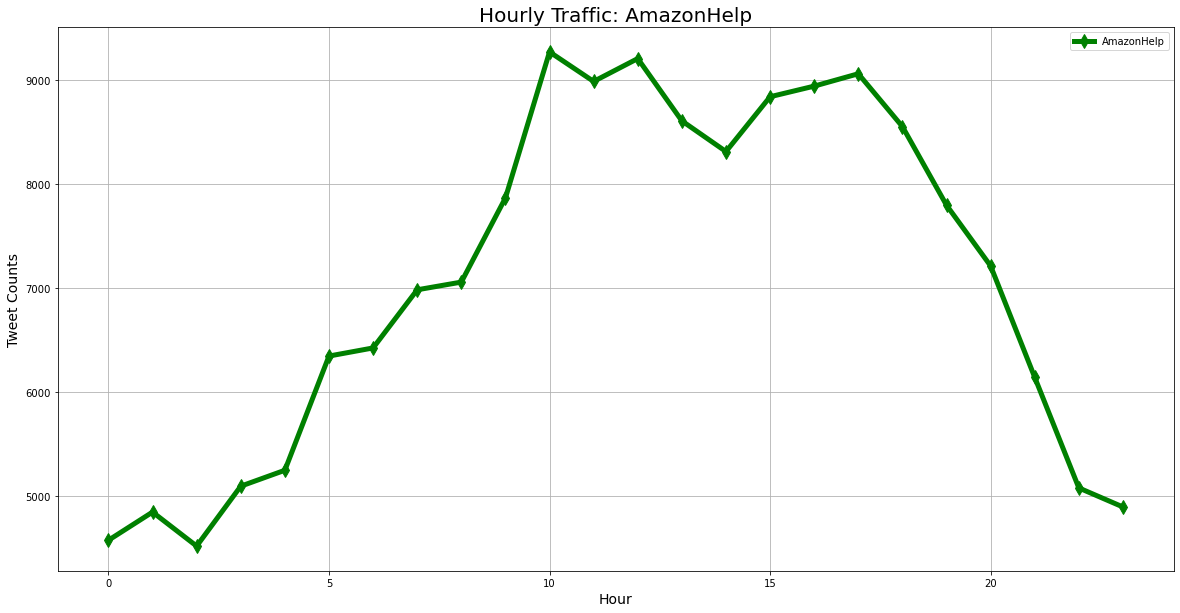

In [377]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_hour_compare_final['Hour'], amzn_sorted_hour_compare_final['AmazonHelp Count'], color='green', marker='d',linewidth=5, markersize=10, label='AmazonHelp')

plt.title('Hourly Traffic: AmazonHelp', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

---

# In Depth Time Analysis of AppleSupport

In [375]:
# New dataframe for Amazon hourly traffic in 2017
dfapple = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
apple_time = dfapple[dfapple['author_id'].str.contains(pat='AppleSupport')]
apple_time['created_at'] = pd.to_datetime(dt['created_at'])
apple_time.sort_values(by='created_at', ascending = True,inplace=True)
apple_time.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2662980349.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2662980349.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,author_id,created_at
2660047,AppleSupport,2016-03-03 13:00:08+00:00
317375,AppleSupport,2016-03-04 20:44:00+00:00
2666889,AppleSupport,2016-04-04 23:03:31+00:00
120098,AppleSupport,2016-04-10 00:27:30+00:00
1135247,AppleSupport,2016-10-01 02:03:26+00:00


In [380]:
apple_time_month = dfapple[dfapple['author_id'].str.contains(pat='AppleSupport')]
apple_time_month['created_at'] = pd.to_datetime(dt['created_at'])
apple_time_month.sort_values(by='created_at', ascending = True,inplace=True)
apple_time_month['Month Count'] = dff.dt.month
apple_month_count = pd.DataFrame({'Twitter Count':apple_time_month['Month Count'].value_counts()})
apple_sorted_month_initial = apple_month_count.sort_index(ascending=True)

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2700050920.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2700050920.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2700050920.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [382]:
apple_sorted_month_compare_final = apple_sorted_month_initial.reset_index(level=0)
apple_sorted_month_compare_final = apple_sorted_month_compare_final.rename(columns={'index':'Month'})
apple_sorted_month_compare_final.head(5)

,Month,Twitter Count
0,1.0,8
1,2.0,3
2,3.0,4
3,4.0,6
4,5.0,6


# Apple traffic peaks at November and sharply drecreases in December
> As shown, this graph demonstrates that November is a point of interest to potentially explain why there is a sharp increase in traffic.

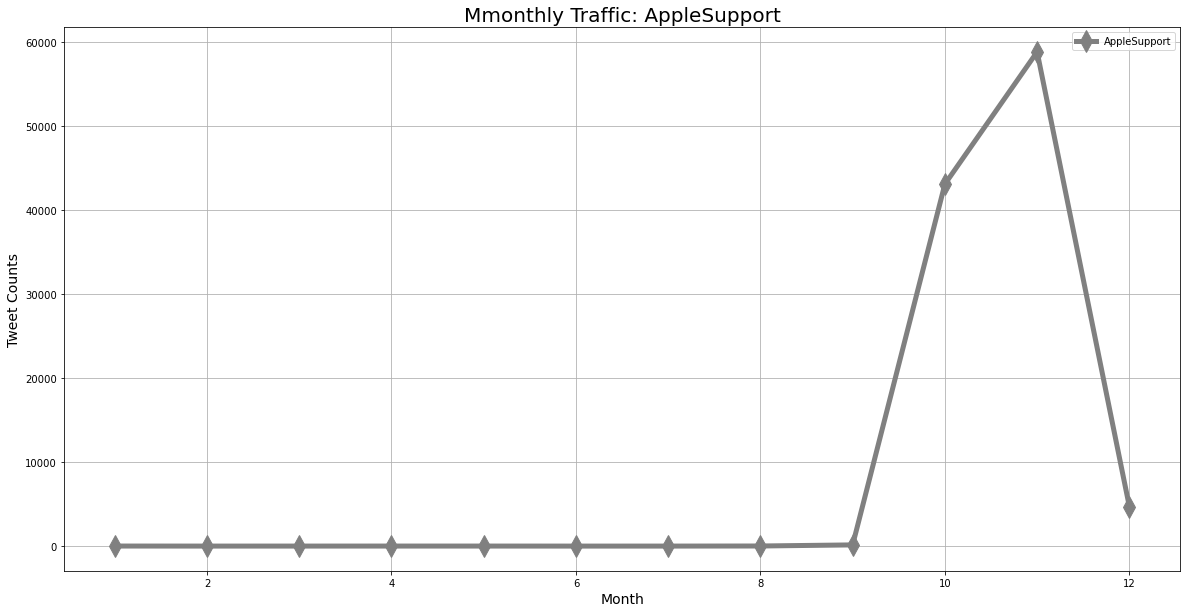

In [388]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_month_compare_final['Month'], apple_sorted_month_compare_final['Twitter Count'], color='gray', marker='d',linewidth=5, markersize=15, label='AppleSupport')

plt.title('Mmonthly Traffic: AppleSupport', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Traffic in November (iPhone X Release)
> As it would seem, there is an iPhone being released during this month which might justify the share increase in traffic.

In [389]:
apple_time_nov = dfapple[dfapple['author_id'].str.contains(pat='AppleSupport')]
apple_time_nov['created_at'] = pd.to_datetime(dt['created_at'])
apple_time_nov.sort_values(by='created_at', ascending = True,inplace=True)
apple_time_nov.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2979059781.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2979059781.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,author_id,created_at
2660047,AppleSupport,2016-03-03 13:00:08+00:00
317375,AppleSupport,2016-03-04 20:44:00+00:00
2666889,AppleSupport,2016-04-04 23:03:31+00:00
120098,AppleSupport,2016-04-10 00:27:30+00:00
1135247,AppleSupport,2016-10-01 02:03:26+00:00


In [398]:
# Amazon November Filter
apple_nov_filt = apple_time_nov.loc[
    (apple_time_nov['created_at'] >= '2017-11-1')
    & (apple_time_nov['created_at'] <= '2017-11-30')]
apple_nov_filt['Day Count'] = dff.dt.day
apple_nov_count = pd.DataFrame({'Twitter Count':apple_nov_filt['Day Count'].value_counts()})
apple_sorted_nov_initial = apple_nov_count.sort_index(ascending=True)

apple_sorted_nov_final = apple_sorted_nov_initial.reset_index(level=0)
apple_sorted_nov_final = apple_sorted_nov_final.rename(columns={'index':'Day'})
apple_sorted_nov_final.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/2561923830.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Day,Twitter Count
0,1,1979
1,2,2475
2,3,2862
3,4,3478
4,5,3776


## Important Dates in November:
>**1) iPhone X Release Date: November 3, 2017**<br>

>**2) Thanksgiving: November 23**

>**3) Black Friday: November 24**<br>

What is revealed is that the traffic generated by the release of a new product is higher than what is generated by events like Black Friday or Thanksgiving. It is also important to note that the increase in traffic is delayed -- meaning traffic does not peak on release day; this makes sense as time increases, more people will have access to the product and will hence access customer support more often.

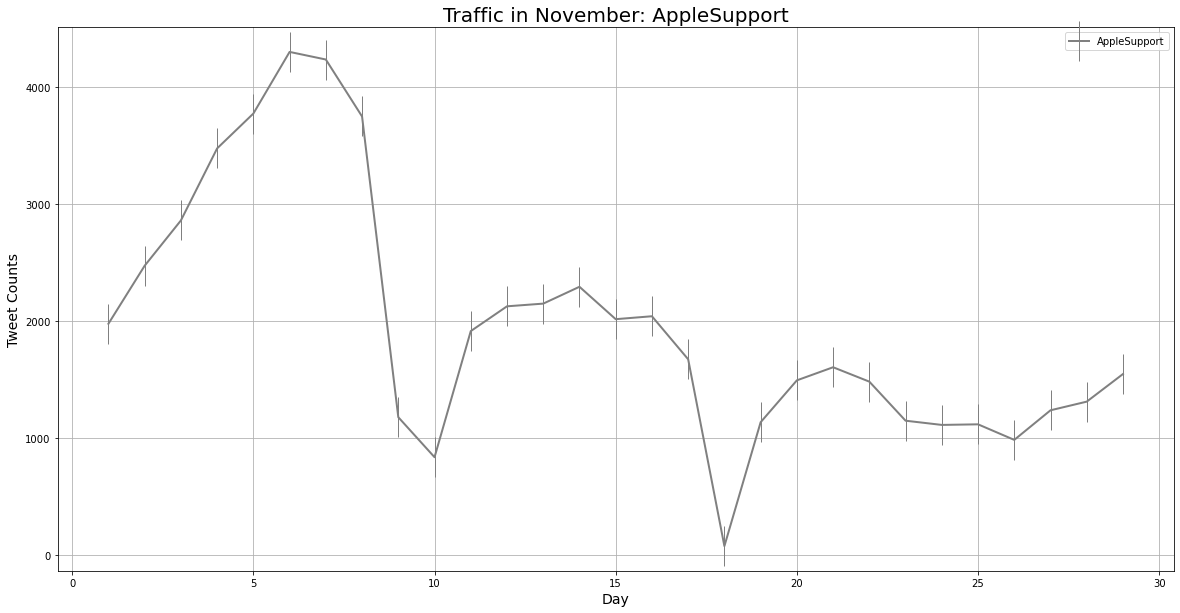

In [429]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_nov_final['Day'], apple_sorted_nov_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=40, label='AppleSupport')

plt.title('Traffic in November: AppleSupport', fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Traffic in September (iPhone 8 Release)
> Although Twitter traffic in September did not peak as much as it did in November, there was still a product release during this month.

In [402]:
# Amazon September Filter
apple_sept_filt = apple_time_nov.loc[
    (apple_time_nov['created_at'] >= '2017-9-1')
    & (apple_time_nov['created_at'] <= '2017-9-30')]
apple_sept_filt['Day Count'] = dff.dt.day
apple_sept_count = pd.DataFrame({'Twitter Count':apple_sept_filt['Day Count'].value_counts()})
apple_sorted_sept_initial = apple_sept_count.sort_index(ascending=True)

apple_sorted_sept_final = apple_sorted_sept_initial.reset_index(level=0)
apple_sorted_sept_final = apple_sorted_sept_final.rename(columns={'index':'Day'})
apple_sorted_sept_final.head()

/var/folders/5x/4d0fl0w52z7bbb4xccn50cx00000gn/T/ipykernel_40498/931812471.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Day,Twitter Count
0,1,1
1,3,1
2,5,2
3,6,2
4,8,2


## iPhone 8 Release Date: September 22, 2017
> Following the release, there is a spike in traffic as people may have potential questions with their phone. Interestingly, traffic seems to build up to the release, but the day after, there is a sharp decrease. This decrease may be due to the fact that access to the new product during the day of and immediate  following are likely restricted. So, it is only untill later that most people are able to have access to it, and consequently ping customer support for help.

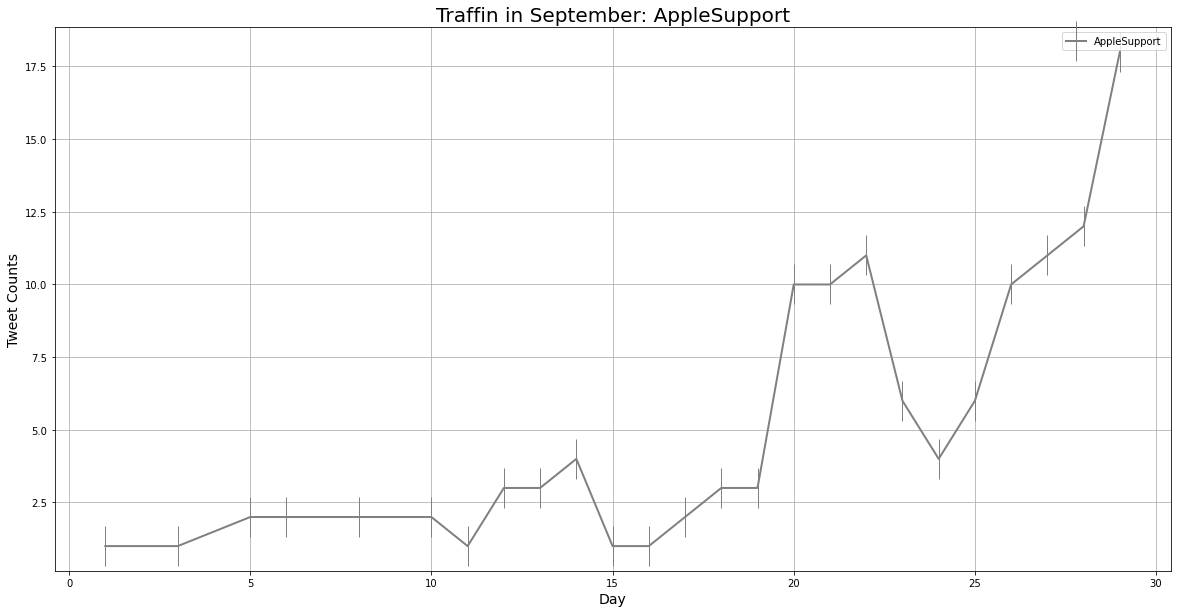

In [428]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_sept_final['Day'], apple_sorted_sept_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=40, label='AppleSupport')

plt.title('Traffin in September: AppleSupport', fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Hourly Traffic: AppleSupport

In [874]:
apple_time['Hours Count'] = dff.dt.hour
apple_hour_count = pd.DataFrame({'Twitter Count':apple_time['Hours Count'].value_counts()})
apple_sorted_hour_initial = apple_hour_count.sort_index(ascending=True)
apple_sorted_hour_initial.head()

,Twitter Count
0.0,5417
1.0,5012
2.0,4870
3.0,3894
4.0,2033


## Missing data in AppleSupport hourly analysis
> It is important to note that there is a gap in the data from hour 6 - 12. It's significance is that we loose out insight during the morning.

In [981]:
apple_sorted_hour_final = apple_sorted_hour_initial.reset_index(level=0)
apple_sorted_hour_final = apple_sorted_hour_final.rename(columns={'index':'Hour'})
apple_sorted_hour_final

,Hour,Twitter Count
0,0.0,5417
1,1.0,5012
2,2.0,4870
3,3.0,3894
4,4.0,2033
5,5.0,647
6,6.0,3
7,12.0,3040
8,13.0,7482
9,14.0,8996


## Apple traffic peaks at 3pm then does down
> Firstly, the gap in data from hour 6 - 12 is emphasized here. But, for everywhere else, the peak in traffic around 3pm may be a product of more people going into Apple Stores and leaving with lingering questions that are asked via the Twitter chatbot. Put another way, social and recreational activity of things like shopping are likely to influence chatbot traffic.

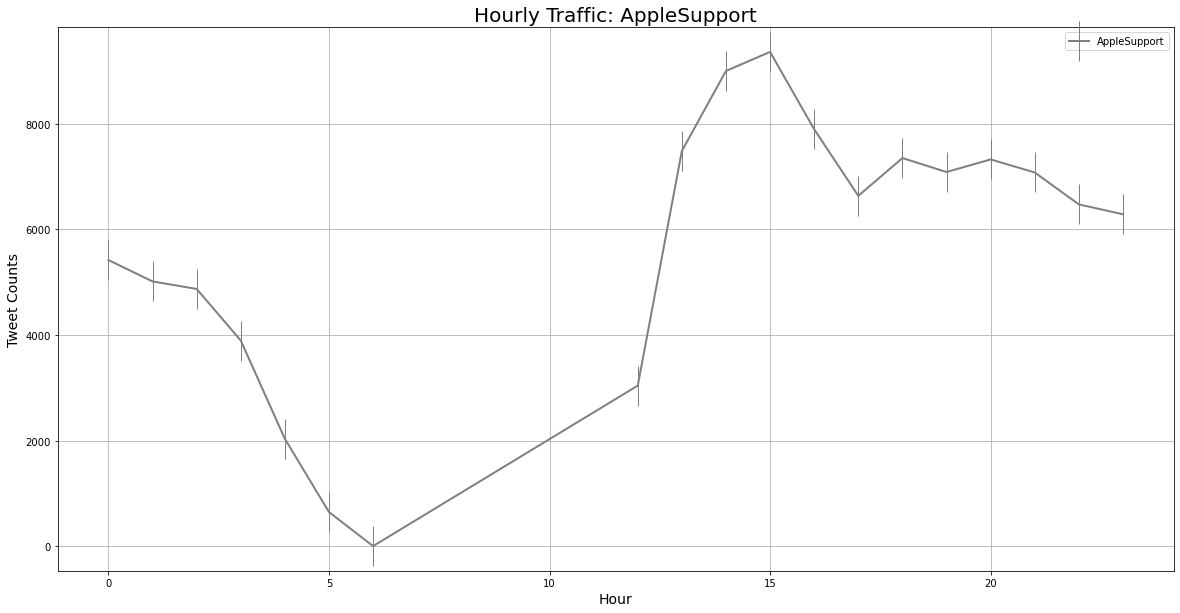

In [979]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=40, label='AppleSupport')

plt.title('Hourly Traffic: AppleSupport', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [957]:
# New dataset for AppleSupport to be used to be merged with others
apple_time['Hours Count'] = dff.dt.hour
apple_hour_compare = pd.DataFrame({'AppleSupport Count':apple_time['Hours Count'].value_counts()})
apple_sorted_hour_compare_initial = apple_hour_compare.sort_index(ascending=True)
apple_sorted_hour_compare_final = apple_sorted_hour_compare_initial.reset_index(level=0)
apple_sorted_hour_compare_final = apple_sorted_hour_compare_final.rename(columns={'index':'Hour'})
apple_sorted_hour_compare_final.head(5)

,Hour,AppleSupport Count
0,0.0,5417
1,1.0,5012
2,2.0,4870
3,3.0,3894
4,4.0,2033


---

# Comparing Hourly Traffic of Top Users to Each Other

## Hourly Traffic of AmazonHelp & Apple_Support: Both increase in traffic around 3pm
> Of the three top users, Amazon and Apple are both uniquely online and in-person retailers. What this means is that due to the common space shared in the industry, they serve as good points for comparison. Furthermore, due to the missing data in Apple during the morning, conclusions between the two cannot be made at that time. Besides the exception, both Apple and Amazon share an increse in traffic around 3pm.

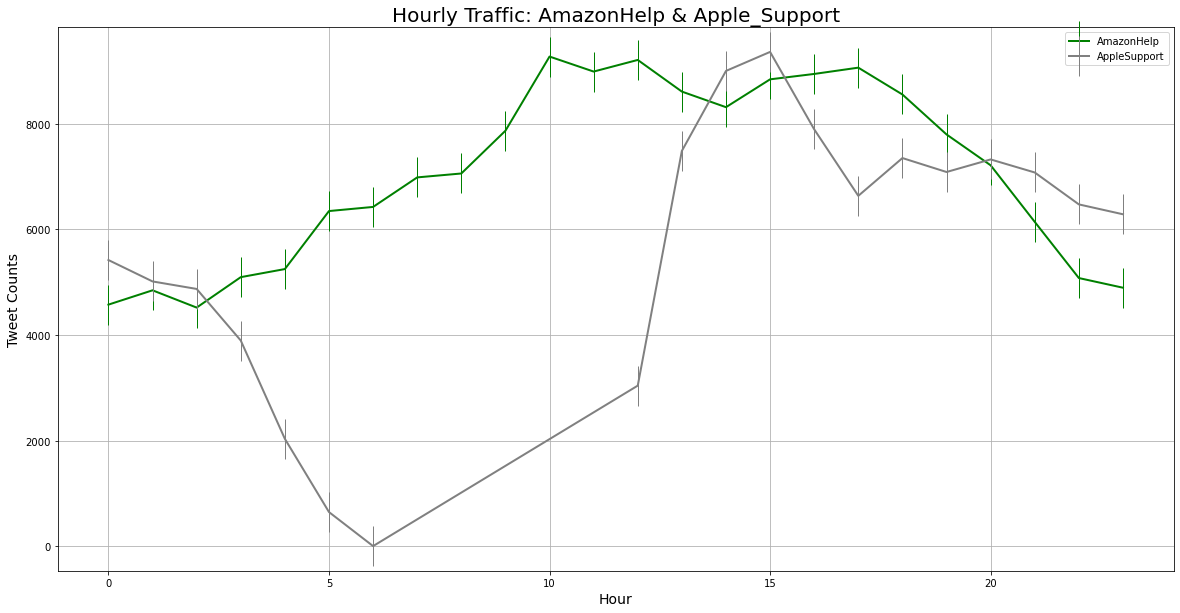

In [983]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_hour_final['Hour'], amzn_sorted_hour_final['Twitter Count'], color='green', marker='|',linewidth=2, markersize=40, label='AmazonHelp')
plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=40, label='AppleSupport')

plt.title('Hourly Traffic: AmazonHelp & Apple_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Hourly Traffic of Top 3 Users AmazonHelp & AppleSupport & Uber_Support: Traffic increases during the afternoon
> With the exception of Uber during early in the morning, all three users share in increase in traffic around afternoon.

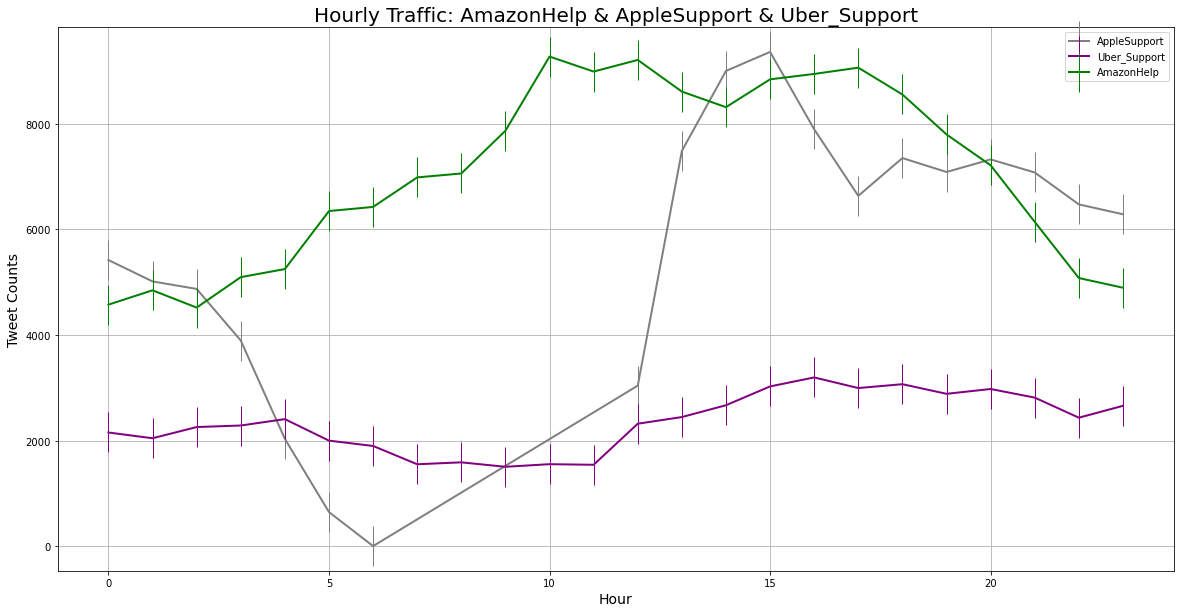

In [986]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=40, label='AppleSupport')
plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=40, label='Uber_Support')
plt.plot(amzn_sorted_hour_final['Hour'], amzn_sorted_hour_final['Twitter Count'], color='green', marker='|',linewidth=2, markersize=40, label='AmazonHelp')

plt.title('Hourly Traffic: AmazonHelp & AppleSupport & Uber_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Comparing Hourly Traffic of Top Users to All Users
> Here, we will be able to see how each top user compares to the average data of all users.

## Hourly Traffic: AmazonHelp & All Users
> With exception of the morning, Amazon follows the mean for the most part.

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>],
      dtype=object)

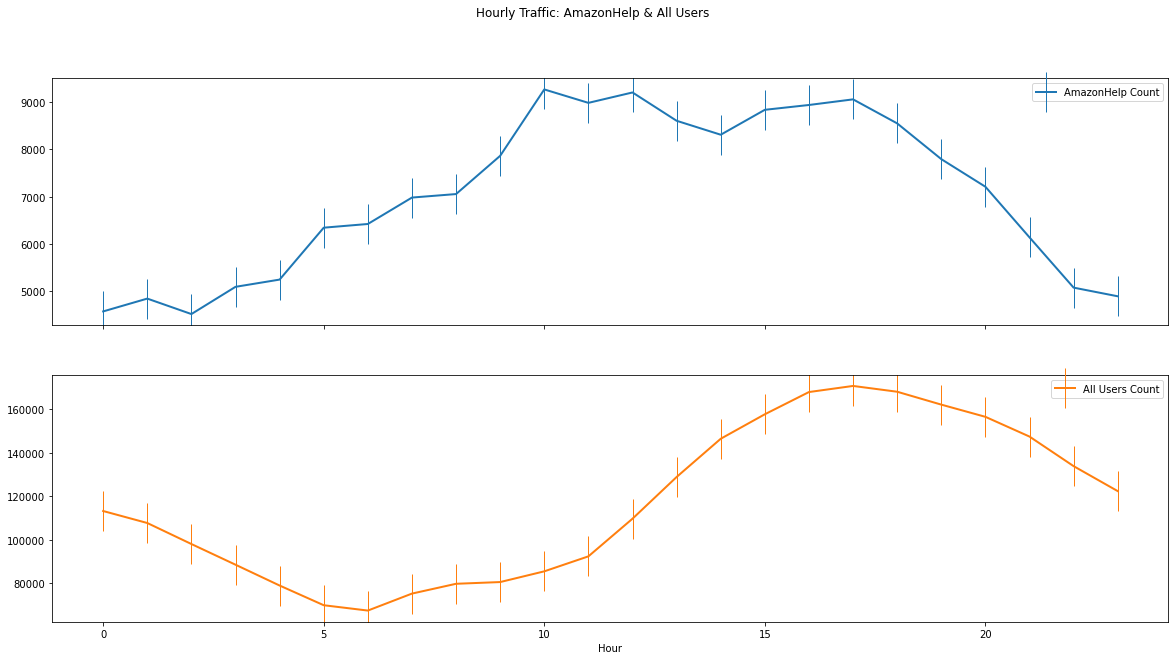

In [987]:
amzn_all_time = pd.merge(amzn_sorted_hour_compare_final,sorted_hour_compare_final)    
amzn_all_time.plot(figsize=(20, 10),title='Hourly Traffic: AmazonHelp & All Users', x='Hour',marker='|',linewidth=2, markersize=40,subplots=True)

## Hourly Traffic: AppleSupport & All Users

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>],
      dtype=object)

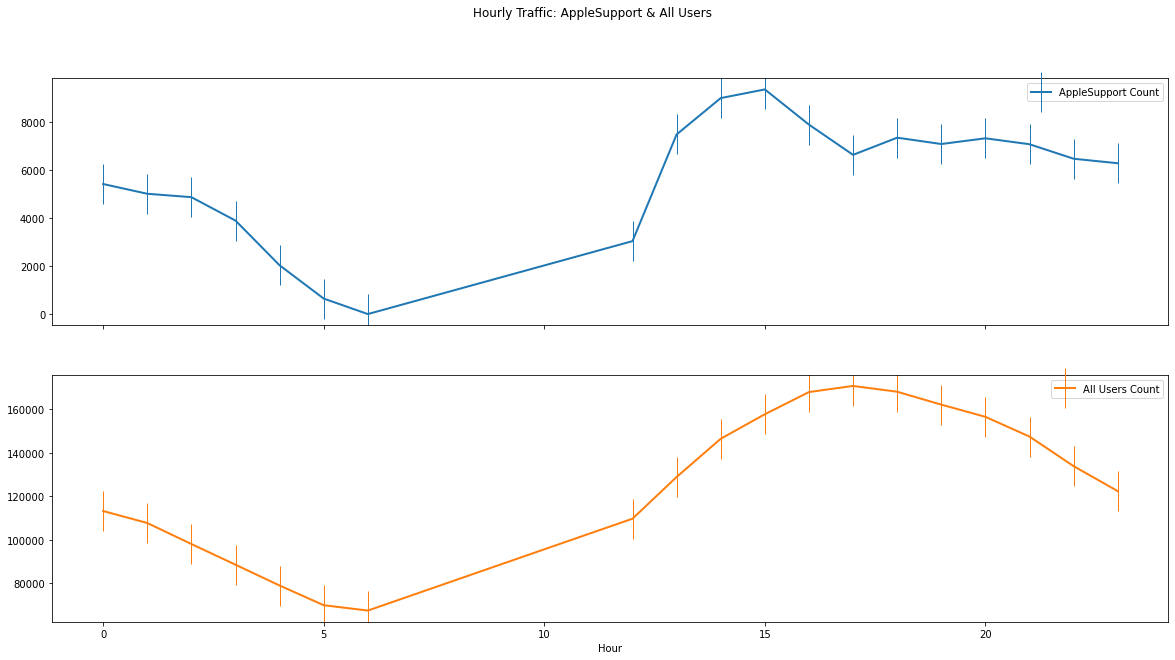

In [988]:
amzn_all_time = pd.merge(apple_sorted_hour_compare_final,sorted_hour_compare_final)    
amzn_all_time.plot(figsize=(20,10),title='Hourly Traffic: AppleSupport & All Users', x='Hour',marker='|',linewidth=2, markersize=40,subplots=True)

## Hourly Traffic: Uber_Support & All Users
> As previously stated, Uber is distinct in it's hourly traffic -- this is reinforced when it is compared to all other users.

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>],
      dtype=object)

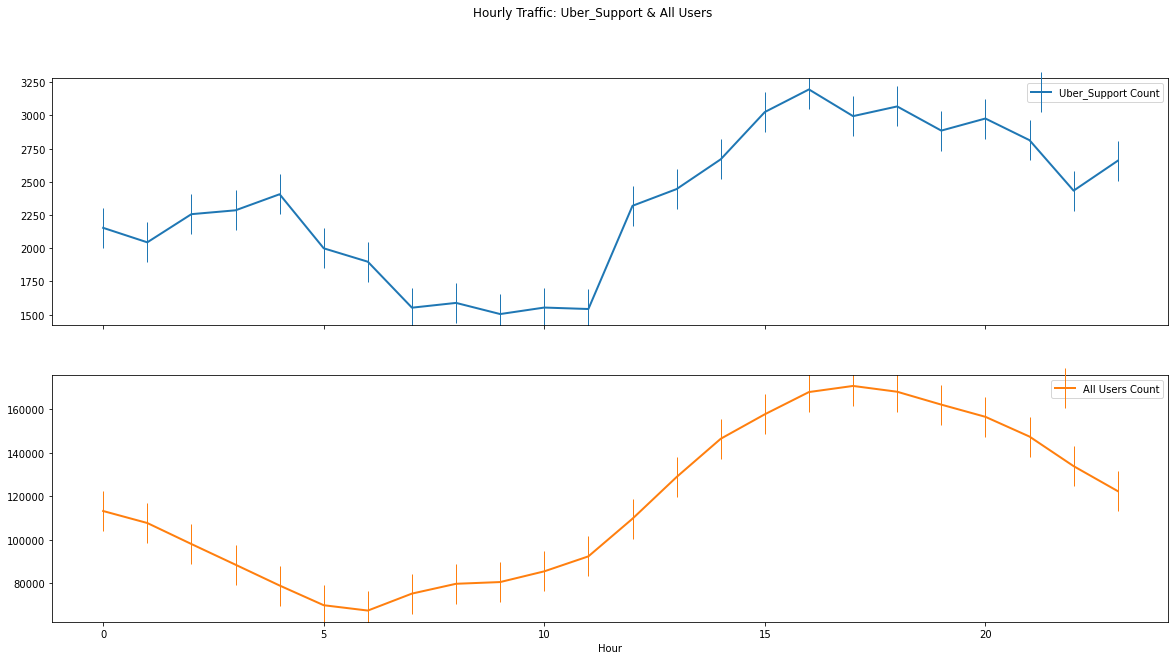

In [989]:
uber_all_time = pd.merge(uber_sorted_hour_compare_final,sorted_hour_compare_final)    
uber_all_time.plot(figsize=(20,10),title='Hourly Traffic: Uber_Support & All Users', x='Hour',marker='|',linewidth=2, markersize=40,subplots=True)
